<a href="https://colab.research.google.com/github/CHRISTIANDAGATTI/A.-No-Supervisado---Grupo9/blob/main/Aprendizaje_NO_supervisado_FIFA22_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practico Aprendizaje NO Supervisado
1. Análisis exploratorio de la base. 
2. Evaluación visual e intuitiva de a dos variables numéricas por vez. 
3. Uso de dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Elección justificada de hiper-parámetros 
4. Evaluación y Análisis de los clusters encontrados. 
5. Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué?
6. Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

## 0 - Inicialización-del-entorno

**Empezamos cargando algunas herramientas para cargar los datos y manipularlos.**

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',120)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from collections import Counter

**Para visualización usaremos principalmente plotly, también seaborn y matplotlib.**

In [ ]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

In [ ]:
from sklearn.cluster import KMeans,MeanShift,DBSCAN
from sklearn import decomposition

## 1 - Exploración de la base

**Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset) (https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset) como 'players_22.csv'.** 

In [ ]:
URL = 'https://drive.google.com/file/d/1eHT4JQcC9vU-4MfxdoSLzhxBTcVjmiKY/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]

In [ ]:
df = pd.read_csv(path)
df.head(2)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   

       short_name                       long_name player_positions  overall  \
0        L. Messi  Lionel Andrés Messi Cuccittini       RW, ST, CF       93   
1  R. Lewandowski              Robert Lewandowski               ST       92   

   potential    value_eur  wage_eur  age         dob  height_cm  weight_kg  \
0         93   78000000.0  320000.0   34  1987-06-24        170         72   
1         92  119500000.0  270000.0   32  1988-08-21        185         81   

   club_team_id            club_name           league_name  league_level  \
0          73.0  Paris Saint-Germain        French Ligue 1           1.0   
1          21.0    FC Bayern München  German 1. Bundesliga           1.0   

  club_position  club_jersey_number club_loaned_from club_joined  \
0            RW                30.0              NaN  2021-08-10   
1            ST                 9.0              NaN  2014-07-01   

   club_contract_valid_until  nationality_id nationality_name  nation_team_id  \
0                     2023.0              52        Argentina          1369.0   
1                     2023.0              37           Poland          1353.0   

  nation_position  nation_jersey_number preferred_foot  weak_foot  \
0              RW                  10.0           Left          4   
1              RS                   9.0          Right          4   

   skill_moves  international_reputation    work_rate body_type real_face  \
0            4                         5   Medium/Low    Unique       Yes   
1            4                         5  High/Medium    Unique       Yes   

   release_clause_eur                                        player_tags  \
0         144300000.0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1         197200000.0  #Aerial Threat, #Distance Shooter, #Clinical F...   

                                       player_traits  pace  shooting  passing  \
0  Finesse Shot, Long Shot Taker (AI), Playmaker ...  85.0      92.0     91.0   
1  Solid Player, Finesse Shot, Outside Foot Shot,...  78.0      92.0     79.0   

   dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0       95.0       34.0    65.0                  85                   95   
1       86.0       44.0    82.0                  71                   95   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       91                 88   
1                          90                       85                 89   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               96           93                 94                  91   
1               85           79                 85                  70   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     80   
1                  88                     77                     79   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                91                  94                95                86   
1                77                  93                82                90   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0             68             72              69                94   
1             85             76              86                87   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                    44                       40                     93   
1                    81                       49                     95   

   mentality_vision  mentality_penalties  mentality_composure  \
0                95                   75                   96   
1                81                  

In [ ]:
print(df.shape)

(19239, 110)


Observamos las columnas que tiene el dataset

In [ ]:
print(df.columns.values)
print(len(df.columns), 'variables')

['sofifa_id' 'player_url' 'short_name' 'long_name' 'player_positions'
 'overall' 'potential' 'value_eur' 'wage_eur' 'age' 'dob' 'height_cm'
 'weight_kg' 'club_team_id' 'club_name' 'league_name' 'league_level'
 'club_position' 'club_jersey_number' 'club_loaned_from' 'club_joined'
 'club_contract_valid_until' 'nationality_id' 'nationality_name'
 'nation_team_id' 'nation_position' 'nation_jersey_number'
 'preferred_foot' 'weak_foot' 'skill_moves' 'international_reputation'
 'work_rate' 'body_type' 'real_face' 'release_clause_eur' 'player_tags'
 'player_traits' 'pace' 'shooting' 'passing' 'dribbling' 'defending'
 'physic' 'attacking_crossing' 'attacking_finishing'
 'attacking_heading_accuracy' 'attacking_short_passing'
 'attacking_volleys' 'skill_dribbling' 'skill_curve' 'skill_fk_accuracy'
 'skill_long_passing' 'skill_ball_control' 'movement_acceleration'
 'movement_sprint_speed' 'movement_agility' 'movement_reactions'
 'movement_balance' 'power_shot_power' 'power_jumping' 'power_stamina'

Hacemos un describe para ver mas informacion de las variables numericas

In [ ]:
df.describe()

sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000  19239.000000   19178.000000  19178.000000   
mean      25.210822    181.299704     74.943032   50580.498123      1.354364   
std        4.748235      6.863179      7.069434   54401.868535      0.747865   
min       16.000000    155.000000     49.000000       1.000000      1.000000   
25%       21.000000    176.000000     70.000000     479.000000      1.000000   
50%       25.000000    181.000000     75.000000    1938.000000      1.000000   
75%       29.000000    186.000000     80.000000  111139.000000      1.000000   
max       54.000000    206.000000    110.000000  115820.000000      5.000000   

       club_jersey_number  club_contract_valid_until  nationality_id  \
count        19178.000000               19178.000000    19239.000000   
mean            20.945250                2022.764000       58.602682   
std             17.909369                   1.213203       50.298614   
min              1.000000                2021.000000        1.000000   
25%              9.000000                2022.000000       21.000000   
50%             18.000000                2022.000000       45.000000   
75%             27.000000                2024.000000       60.000000   
max             99.000000                2031.000000      219.000000   

       nation_team_id  nation_jersey_number     weak_foot   skill_moves  \
count      759.000000            759.000000  19239.000000  19239.000000   
mean     14480.848485             12.567852      2.946151      2.352461   
std      35328.730217              7.039116      0.671560      0.767659   
min       1318.000000              1.000000      1.000000      1.000000   
25%       1338.000000              7.000000      3.000000      2.000000   
50%       1357.000000             12.000000      3.000000      2.000000   
75%       1386.000000             19.000000      3.000000      3.000000   
max     111473.000000             28.000000      5.000000      5.000000   

       international_reputation  release_clause_eur          pace  \
count              19239.000000        1.806300e+04  17107.000000   
mean                   1.094184        5.374044e+06     68.213071   
std                    0.371098        1.494837e+07     10.933155   
min                    1.000000        1.600000e+04     28.000000   
25%                    1.000000        8.060000e+05     62.000000   
50%                    1.000000        1.600000e+06     69.000000   
75%                    1.000000        3.700000e+06     76.000000   
max                    5.000000        3.735000e+08     97.000000   

           shooting       passing     dribbling     defending        physic  \
count  17107.000000  17107.000000  17107.000000  17107.000000  17107.000000   
mean      52.345297     57.312562     62.561174     51.703630     64.823289   
std       14.051623     10.068965      9.651312     16.189746      9.791886   
min       18.000000     25.000000     27.000000     14.000000     29.000000   
25%       42.000000     51.000000     57.000000     37.000000     59.000000   
50%       54.000000     58.000000     64.000000     56.000000     66.000000   
75%       63.000000     64.000000     69.000000     64.00000

Agrupamos los jugadores por equipos y obtenemos la media del atributo Overall de sus jugadores. Luego ordenamos de mayor a menor para ver los clubes con mejor promedio de Overall.

In [ ]:
club_avg_overall=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(8)

club_name    overall
368             Juventus  79.961538
470  Paris Saint-Germain  79.454545
358                Inter  78.857143
241    FC Bayern München  78.071429
412    Manchester United  78.000000
509       Real Madrid CF  77.757576
434               Napoli  77.500000
63              Atalanta  77.480000

Agrupamos la cantidad de jugadores según su nacionalidad continuando con el analisis exploratorio de nuestros datos:

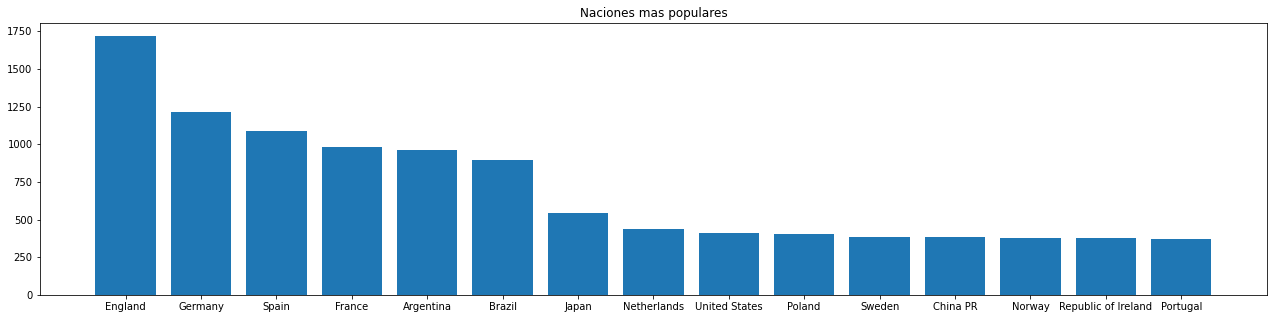

In [ ]:
# Inspeccionamos y visualizamos las nacionalidades más populares
bar_plot = dict(Counter(df['nationality_name'].values).most_common(15))
fig, ax = plt.subplots(figsize = (22,5))
plt.bar(*zip(*bar_plot.items()))
ax.set_title('Naciones mas populares')
plt.show()

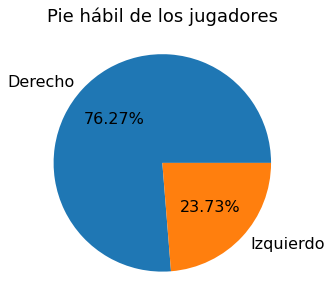

In [ ]:
# Inspeccionamos cuál es el pie hábil de los jugadores
preferred_foot_labels = df["preferred_foot"].value_counts().index # (Derecho, Izquierdo) 
preferred_foot_values = df["preferred_foot"].value_counts().values # (Valores para el derecho, Valores para el izquierdo)
explode = (0, 0.1) # Esto se usa para hacer la separación en el gráfico

# Visualizamos incluyendo porcentajes usando autopct
plt.figure(figsize = (5,5))
plt.pie(preferred_foot_values, labels=['Derecho', 'Izquierdo'], autopct='%1.2f%%', textprops={'fontsize': 16})
plt.title('Pie hábil de los jugadores', color = 'black',fontsize = 18)
plt.show()

En la siguiente celda redefinimos las posiciones de los jugadores como arquero, defensor, mediocampista o atacante, y agregamos una nueva columna al dataframe llamado "posicion"

In [ ]:

arquero = ['GK']
defensor = ['CB', 'LCB', 'RCB', 'LB' , 'RB']
mediocampista = ['CM', 'LDM', 'LAM', 'RDM', 'CDM', 'CAM', 'LM', 'RM']
atacante = ['ST', 'CF', 'LW', 'RW']


df['posicion'] = ''
for i, posicion_del_jugador in enumerate(df['player_positions']):
    for posicion in arquero:
        if posicion in posicion_del_jugador:
            df.loc[i, 'posicion'] = 'arquero'
    for posicion in defensor:
        if posicion in posicion_del_jugador:
            df.loc[i, 'posicion'] = 'defensor'
    for posicion in mediocampista:
        if posicion in posicion_del_jugador:
            df.loc[i, 'posicion'] = 'mediocampista'
    for posicion in atacante:
        if posicion in posicion_del_jugador:
            df.loc[i, 'posicion'] = 'atacante'

In [ ]:
df.head()


sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age         dob  height_cm  \
0       93         93   78000000.0  320000.0   34  1987-06-24        170   
1       92         92  119500000.0  270000.0   32  1988-08-21        185   
2       91         91   45000000.0  270000.0   36  1985-02-05        187   
3       91         91  129000000.0  270000.0   29  1992-02-05        175   
4       91         91  125500000.0  350000.0   30  1991-06-28        181   

   weight_kg  club_team_id            club_name             league_name  \
0         72          73.0  Paris Saint-Germain          French Ligue 1   
1         81          21.0    FC Bayern München    German 1. Bundesliga   
2         83          11.0    Manchester United  English Premier League   
3         68          73.0  Paris Saint-Germain          French Ligue 1   
4         70          10.0      Manchester City  English Premier League   

   league_level club_position  club_jersey_number club_loaned_from  \
0           1.0            RW                30.0              NaN   
1           1.0            ST                 9.0              NaN   
2           1.0            ST                 7.0              NaN   
3           1.0            LW                10.0              NaN   
4           1.0           RCM                17.0              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                     2023.0              52        Argentina   
1  2014-07-01                     2023.0              37           Poland   
2  2021-08-27                     2023.0              38         Portugal   
3  2017-08-03                     2025.0              54           Brazil   
4  2015-08-30                     2025.0               7          Belgium   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              RW                  10.0           Left   
1          1353.0              RS                   9.0          Right   
2          1354.0              ST                   7.0          Right   
3             NaN             NaN                   NaN          Right   
4          1325.0             RCM                   7.0          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0          4            4                         5   Medium/Low    Unique   
1          4            4                         5  High/Medium    Unique   
2          4            5                         5     High/Low    Unique   
3          5            5                         5  High/Medium    Unique   
4          5            4                         4    High/High    Unique   

  real_face  release_clause_eur  \
0       Yes         144300000.0   
1       Yes         197200000.0   
2       Yes          83300000.0   
3       Yes         238700000.0   
4       Yes         232200000.0   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Distance Shoote

Observamos la proporcion de valores Nan en cada variable

In [ ]:
nans = df.isna().sum().sort_values(ascending=False)
print(nans[nans!=0]/df.shape[0])

nation_jersey_number         0.960549
nation_logo_url              0.960549
nation_position              0.960549
nation_team_id               0.960549
club_loaned_from             0.942721
player_tags                  0.925100
goalkeeping_speed            0.889183
player_traits                0.511513
dribbling                    0.110817
shooting                     0.110817
passing                      0.110817
physic                       0.110817
defending                    0.110817
pace                         0.110817
release_clause_eur           0.061126
club_joined                  0.060450
value_eur                    0.003846
club_contract_valid_until    0.003171
league_level                 0.003171
club_jersey_number           0.003171
club_position                0.003171
league_name                  0.003171
club_name                    0.003171
wage_eur                     0.003171
club_logo_url                0.003171
club_flag_url                0.003171
club_team_id

Eliminamos variables que tengan mas del 50% de valores faltantes

In [ ]:
drop_vars = nans[list(nans/df.shape[0] > 0.5)].keys() #aca ubicamos las columnas del dataframe que tienen mas del 50% de valores perdidos
for var in drop_vars:
    print(var)
    df.drop(var,inplace=True,axis=1) #desechamos las columnas que identificamos anteriormente

nation_jersey_number
nation_logo_url
nation_position
nation_team_id
club_loaned_from
player_tags
goalkeeping_speed
player_traits


Llenamos los valores perdidos que quedaron en el dataframe y para hacerlo le pedimos que utilize el promedio sobre los datos que no son nulos 

In [ ]:

df.fillna(df.mean(numeric_only=True), inplace=True)

Exploramos las variables numericas

In [ ]:
#¿Cuantas variables numericas hay en el dataset?
df_num = df.select_dtypes(include=np.number)
print(df_num.shape)


(19239, 57)


<function matplotlib.pyplot.show(*args, **kw)>

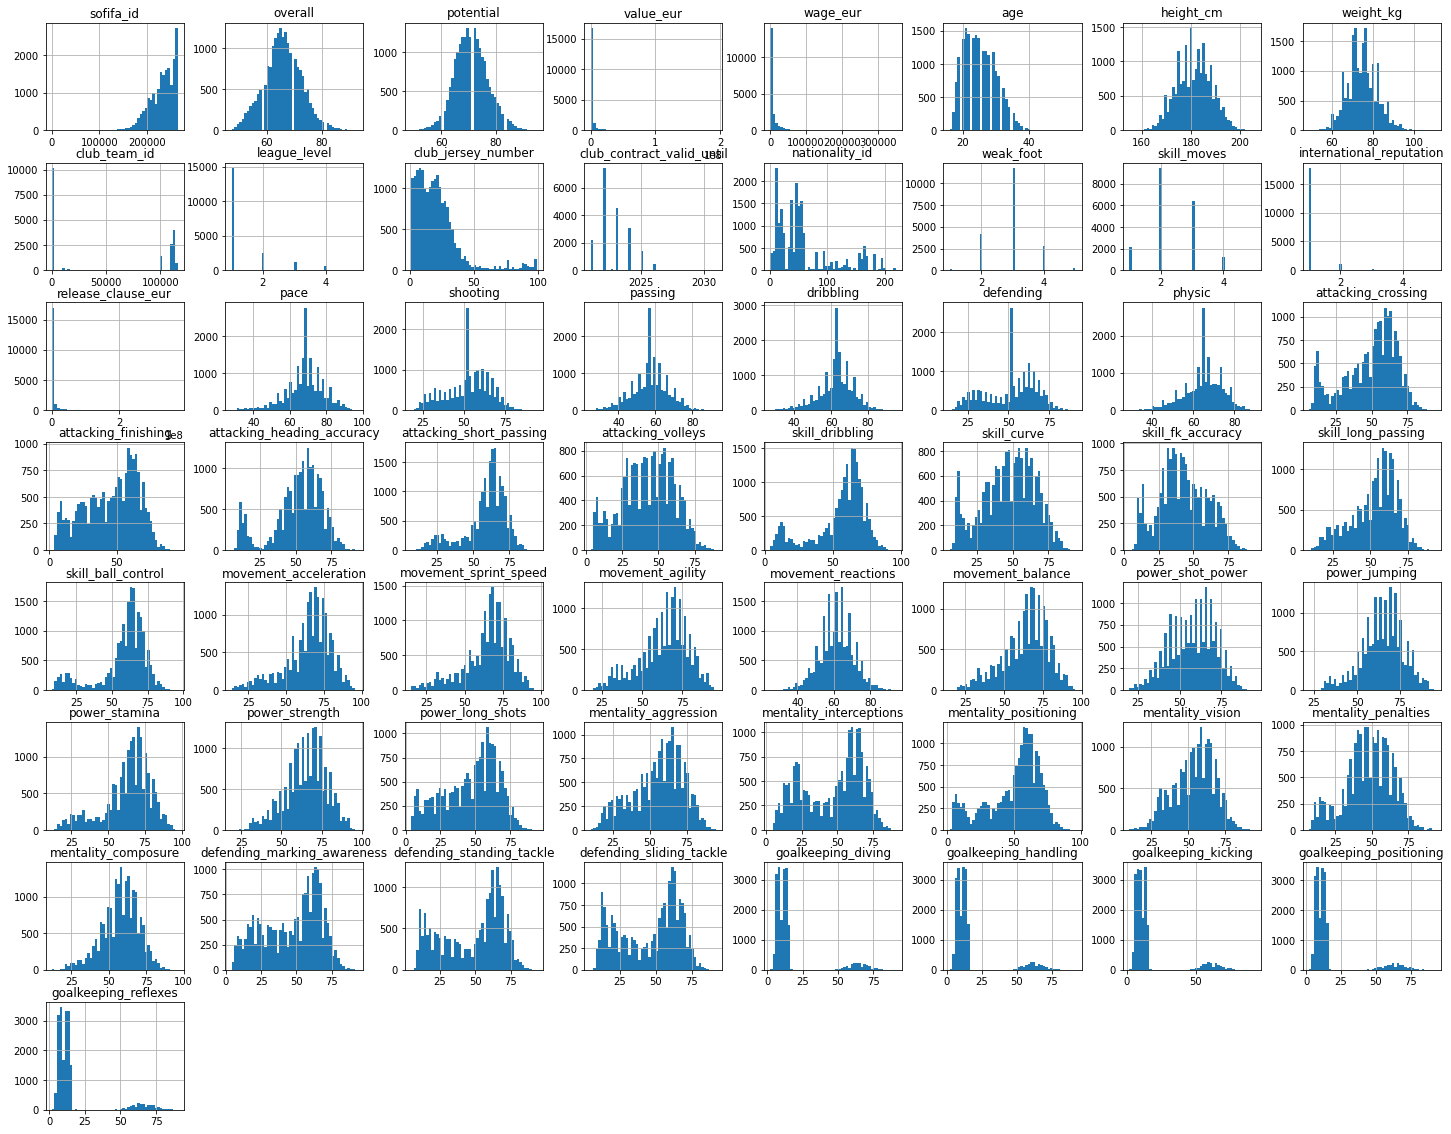

In [ ]:
#exploramos visualmente todas las variables numericas
df_num.hist(bins=50, figsize=(25,20))
plt.show

Vemos los estadisticos para cada clase en todas las categorias

In [ ]:
df.groupby('posicion').describe()

sofifa_id                                                   \
                  count           mean           std      min        25%   
posicion                                                                   
arquero          2132.0  226454.030957  33484.211449   1179.0  207932.75   
atacante         5762.0  231385.891357  26513.886246   2702.0  214621.50   
defensor         4656.0  231288.272981  26592.102795  18115.0  213659.00   
mediocampista    6689.0  233262.195545  25236.832601     41.0  218880.00   

                                             overall                       \
                    50%        75%       max   count       mean       std   
posicion                                                                    
arquero        233237.5  253339.50  264588.0  2132.0  64.419794  7.567537   
atacante       236313.0  253206.75  264639.0  5762.0  66.387365  6.814850   
defensor       236074.0  253438.00  264628.0  4656.0  65.652706  6.681739   
mediocampista  237874.0  253966.00  264640.0  6689.0  65.756466  6.776466   

                                            potential                       \
                min   25%   50%   75%   max     count       mean       std   
posicion                                                                     
arquero        47.0  59.0  64.0  69.0  91.0    2132.0  69.785647  6.243046   
atacante       47.0  62.0  66.0  71.0  93.0    5762.0  71.600833  6.111387   
defensor       47.0  62.0  66.0  70.0  89.0    4656.0  70.752363  5.954021   
mediocampista  47.0  62.0  66.0  70.0  91.0    6689.0  71.270145  6.033832   

                                            value_eur                \
                min   25%   50%   75%   max     count          mean   
posicion                                                              
arquero        51.0  66.0  70.0  74.0  93.0    2132.0  1.934216e+06   
atacante       49.0  67.0  71.0  76.0  95.0    5762.0  3.531438e+06   
defensor       51.0  67.0  70.0  75.0  92.0    4656.0  2.473011e+06   
mediocampista  49.0  67.0  71.0  75.0  92.0    6689.0  2.818599e+06   

                                                                      \
                        std      min       25%        50%        75%   
posicion                                                               
arquero        6.645810e+06   9000.0  250000.0   500000.0  1200000.0   
atacante       9.345111e+06  35000.0  575000.0  1200000.0  2400000.0   
defensor       6.303711e+06  15000.0  475000.0   900000.0  1800000.0   
mediocampista  6.955584e+06  15000.0  525000.0  1000000.0  2200000.0   

                           wage_eur                                     \
                       max    count          mean           std    min   
posicion                                                                 
arquero        119500000.0   2132.0   6359.964313  15579.662284  500.0   
atacante       194000000.0   5762.0  10855.032607  23142.608499  500.0   
defensor       114000000.0   4656.0   8499.522718  17451.773066  500.0   
mediocampista  125500000.0   6689.0   8643.620538  18188.749285  500.0   

                                                     age                       \
                  25%     50%      75%       max   count       mean       std   
posicion                                                                        
arquero         787.5  2000.0   6000.0  250000.0  2132.0  26.198874  5.518268   
atacante       1000.0  3000.0  10000.0  350000.0  5762.0  25.035404  4.620746   
defensor       1000.0  3000.0   8000.0  230000.0  4656.0  25.480026  4.712170   
mediocampista  1000.0  3000.0   8000.0  350000.0  6689.0  24.859620  4.559796   

                                            height_cm                        \
                min   25%   50%   75%   max     count        mean       std   
posicion                                                                      
arquero        16.0  22.0  25.0  30.0  43.0    2132.0  188.533771  

Distinguimos las categorias que refieren a aspectos de un jugador en grupos: caracteristicas físicas como el peso o la altura, por otro lado las habilidades en el juego, posicionamiento en el terreno de juego, o velocidad de movimiento

In [ ]:
columns1 = ['height_cm','weight_kg','age']
columns2 = ['pace', 'shooting', 'passing']
columns3 = ['power_jumping', 'power_stamina', 'power_strength']
columns4 = ['dribbling', 'defending']
columns5 = ['movement_acceleration', 'movement_sprint_speed',
       'movement_agility']

In [ ]:
df.groupby(['posicion'])[columns1].describe()

height_cm                                                    \
                  count        mean       std    min    25%    50%    75%   
posicion                                                                    
arquero          2132.0  188.533771  4.742876  174.0  185.0  188.0  192.0   
atacante         5762.0  179.887365  6.486174  156.0  175.0  180.0  185.0   
defensor         4656.0  183.593643  6.157914  160.0  180.0  184.0  188.0   
mediocampista    6689.0  178.613844  6.034336  155.0  175.0  178.0  183.0   

                     weight_kg                                               \
                 max     count       mean       std   min   25%   50%   75%   
posicion                                                                      
arquero        206.0    2132.0  81.697467  6.295398  60.0  78.0  81.0  86.0   
atacante       203.0    5762.0  73.837730  6.876414  53.0  70.0  73.0  78.0   
defensor       202.0    4656.0  76.916022  6.556016  52.0  72.0  77.0  81.0   
mediocampista  203.0    6689.0  72.368964  5.962420  49.0  68.0  72.0  76.0   

                         age                                               \
                 max   count       mean       std   min   25%   50%   75%   
posicion                                                                    
arquero        107.0  2132.0  26.198874  5.518268  16.0  22.0  25.0  30.0   
atacante       110.0  5762.0  25.035404  4.620746  16.0  21.0  25.0  28.0   
defensor       100.0  4656.0  25.480026  4.712170  16.0  22.0  25.0  29.0   
mediocampista   96.0  6689.0  24.859620  4.559796  16.0  21.0  24.0  28.0   

                     
                max  
posicion             
arquero        43.0  
atacante       54.0  
defensor       41.0  
mediocampista  41.0

Vemos en la tabla anterior que los arqueros tienen en promedio mayor edad, al igual que peso y altura

In [ ]:
df.groupby(['posicion'])[columns2].describe()

pace                                                 \
                count       mean           std        min        25%   
posicion                                                               
arquero        2132.0  68.213071  1.421419e-14  68.213071  68.213071   
atacante       5762.0  72.982645  9.745381e+00  28.000000  68.000000   
defensor       4656.0  63.550473  1.150925e+01  28.000000  57.000000   
mediocampista  6689.0  67.349978  9.810660e+00  28.000000  62.000000   

                                               shooting                        \
                     50%        75%        max    count       mean        std   
posicion                                                                        
arquero        68.213071  68.213071  68.213071   2132.0  52.345297   0.000000   
atacante       74.000000  79.750000  97.000000   5762.0  61.426762  10.434474   
defensor       65.000000  72.000000  93.000000   4656.0  37.850301  10.434478   
mediocampista  68.000000  73.000000  96.000000   6689.0  54.611900  10.629474   

                                                                     passing  \
                     min        25%        50%        75%        max   count   
posicion                                                                       
arquero        52.345297  52.345297  52.345297  52.345297  52.345297  2132.0   
atacante       20.000000  56.000000  62.000000  68.000000  94.000000  5762.0   
defensor       18.000000  30.000000  36.000000  45.000000  75.000000  4656.0   
mediocampista  21.000000  48.000000  55.000000  62.000000  86.000000  6689.0   

                                                                     \
                    mean       std        min        25%        50%   
posicion                                                              
arquero        57.312562  0.000000  57.312562  57.312562  57.312562   
atacante       57.472579  9.506520  30.000000  51.000000  58.000000   
defensor       50.876718  9.822367  25.000000  44.000000  51.000000   
mediocampista  61.654507  8.160862  29.000000  56.000000  61.000000   

                                     
                     75%        max  
posicion                             
arquero        57.312562  57.312562  
atacante       64.000000  91.000000  
defensor       58.000000  88.000000  
mediocampista  67.000000  93.000000

En la tabla anterior, vemos que el atributo "pace" que refiere a la velocidad al trotar y correr en el campo es inferior en promedio en los defensores, y mayor en atacantes. El "shooting" (pateo para marcar gol, ganar un crner o despejar la pelota del arco), es superior en promedio en atacantes y muy inferior en arqueros. Por ultimo, el "passsing" o la precision en el pase, se observa muy inferior en defensores que en el resto de las posiciones.

In [ ]:
df.groupby(['posicion'])[columns3].describe()

power_jumping                                                \
                      count       mean        std   min   25%   50%   75%   
posicion                                                                    
arquero              2132.0  56.648687  11.746778  22.0  50.0  58.0  65.0   
atacante             5762.0  65.376952  12.228536  29.0  58.0  66.0  73.0   
defensor             4656.0  70.518041  10.276128  29.0  65.0  71.0  77.0   
mediocampista        6689.0  62.959785  11.351484  29.0  56.0  63.0  71.0   

                    power_stamina                                          \
                max         count       mean        std   min   25%   50%   
posicion                                                                    
arquero        84.0        2132.0  29.374296   7.617847  12.0  24.0  28.5   
atacante       95.0        5762.0  66.056751  11.165219  26.0  59.0  67.0   
defensor       94.0        4656.0  66.817655  10.123917  29.0  61.0  67.0   
mediocampista  94.0        6689.0  68.671251  11.908832  24.0  62.0  70.0   

                          power_strength                                    \
                75%   max          count       mean        std   min   25%   
posicion                                                                     
arquero        35.0  45.0         2132.0  59.773921  11.068683  25.0  53.0   
atacante       74.0  95.0         5762.0  64.757723  12.894346  22.0  57.0   
defensor       73.0  95.0         4656.0  71.672466  10.833091  24.0  65.0   
mediocampista  77.0  97.0         6689.0  62.252205  12.249350  19.0  55.0   

                                 
                50%   75%   max  
posicion                         
arquero        61.0  68.0  85.0  
atacante       66.0  74.0  97.0  
defensor       73.0  80.0  96.0  
mediocampista  64.0  71.0  94.0

De nuevo, todas las habilidades relacionadas a la capacidad de saltar ("power jumping"), la resistencia ("power stamina")y la fuerza ("power strength") son considerablemente mas bajas en arqueros, y muy similares en las otras tres posiciones.

In [ ]:
df.groupby(['posicion'])[columns4].describe()

dribbling                                                 \
                  count       mean           std        min        25%   
posicion                                                                 
arquero          2132.0  62.561174  7.107094e-15  62.561174  62.561174   
atacante         5762.0  66.174072  7.555229e+00  36.000000  61.000000   
defensor         4656.0  54.531143  9.873066e+00  27.000000  48.000000   
mediocampista    6689.0  65.038421  7.678275e+00  33.000000  60.000000   

                                               defending             \
                     50%        75%        max     count       mean   
posicion                                                              
arquero        62.561174  62.561174  62.561174    2132.0  51.703630   
atacante       66.000000  71.000000  95.000000    5762.0  37.861333   
defensor       55.000000  62.000000  87.000000    4656.0  64.282431   
mediocampista  65.000000  70.000000  91.000000    6689.0  54.871879   

                                                                               
                        std       min       25%       50%       75%       max  
posicion                                                                       
arquero        7.107094e-15  51.70363  51.70363  51.70363  51.70363  51.70363  
atacante       1.417181e+01  14.00000  27.00000  34.00000  46.00000  84.00000  
defensor       7.432382e+00  43.00000  59.00000  64.00000  69.00000  91.00000  
mediocampista  1.317857e+01  16.00000  47.00000  58.00000  64.00000  89.00000

Observamos que el "dribbling" es mas bajo en defensores, y "defending", es naturalmente mas alto en defensores, le siguen los mediocampistas y arqueros y por ultimo atacantes.

In [ ]:
df.groupby(['posicion'])[columns5].describe()

movement_acceleration                                          \
                              count       mean        std   min   25%   50%   
posicion                                                                      
arquero                      2132.0  36.327861  11.293363  14.0  28.0  36.0   
atacante                     5762.0  72.919646  10.281102  27.0  67.0  74.0   
defensor                     4656.0  62.721220  11.998515  27.0  55.0  64.0   
mediocampista                6689.0  67.904470  10.101399  29.0  63.0  68.0   

                          movement_sprint_speed                              \
                75%   max                 count       mean        std   min   
posicion                                                                      
arquero        45.0  65.0                2132.0  36.618199  11.044877  15.0   
atacante       80.0  97.0                5762.0  73.023256   9.892083  27.0   
defensor       71.0  94.0                4656.0  64.204038  11.882473  28.0   
mediocampista  74.0  96.0                6689.0  66.868889  10.336923  28.0   

                                      movement_agility                        \
                25%   50%   75%   max            count       mean        std   
posicion                                                                       
arquero        28.0  37.0  45.0  65.0           2132.0  38.886961  11.082637   
atacante       68.0  74.0  80.0  97.0           5762.0  70.699583  10.689792   
defensor       57.0  66.0  72.0  94.0           4656.0  58.217784  12.236895   
mediocampista  62.0  67.0  73.0  96.0           6689.0  68.820152  10.396265   

                                             
                min   25%   50%   75%   max  
posicion                                     
arquero        18.0  31.0  37.0  45.0  70.0  
atacante       28.0  64.0  71.0  78.0  96.0  
defensor       25.0  50.0  59.0  67.0  95.0  
mediocampista  29.0  62.0  69.0  76.0  94.0

Por ultimo, vemos que las habilidades relacionadas con el movimiento son bajisimas en arqueros, muy altas en atacantes y mediocampistas y ligeramente mas bajas en defensores.

Dado que tenemos 57 variables numericas, vamos a mostrar las 15 variables más correlacionadas entre sí 

In [ ]:
# Sacamos el valor absoluto
corr_mini = df_num.corr().abs()
# Llenamos la diagonal de NAN para que no cuenten a la hora de sacar los máximos
np.fill_diagonal(corr_mini.values, np.nan)

# Sacamos parejas y las ordenamos
pairs = corr_mini.unstack()
sorted_pairs = pairs.sort_values(ascending=False)

# Transformamos los indices en una lista ordenada.
correlacionadas = []
for pair in sorted_pairs.index:
  correlacionadas.append(pair[0])
  correlacionadas.append(pair[1])
# Eliminamos los duplicados y nos quedamos con las 15 primeras
cor= list(dict.fromkeys(correlacionadas))[:15]
print(cor)

['value_eur', 'release_clause_eur', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_reflexes', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_positioning', 'goalkeeping_kicking', 'mentality_interceptions', 'skill_ball_control', 'skill_dribbling', 'defending_marking_awareness', 'movement_sprint_speed', 'movement_acceleration']


Vemos las correlaciones entre las primeras 15 mas correlacionadas




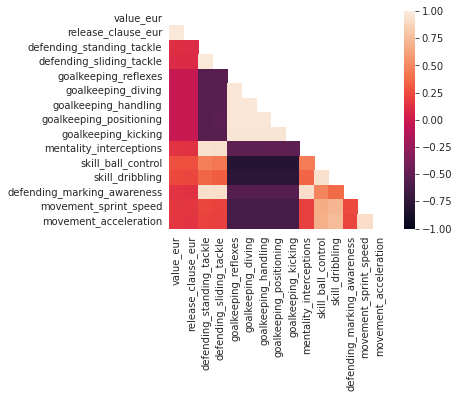

In [ ]:
corr = df_num[cor].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  sns.heatmap(corr, mask=mask, square=True, vmin=-1, vmax=1)

Observamos que las variables relacionadas con "goalkeeping" estan altamente correlacionadas entre si, y entre estas y las relacionadas con el movimiento, control de la pelota y dribbling

## 2 - Evaluacion de a 2 variables

Realizamos graficos de distribucion y correlacion entre dos variables por vez, agrupado por tipo de habilidad o atributo

<Figure size 720x720 with 0 Axes>

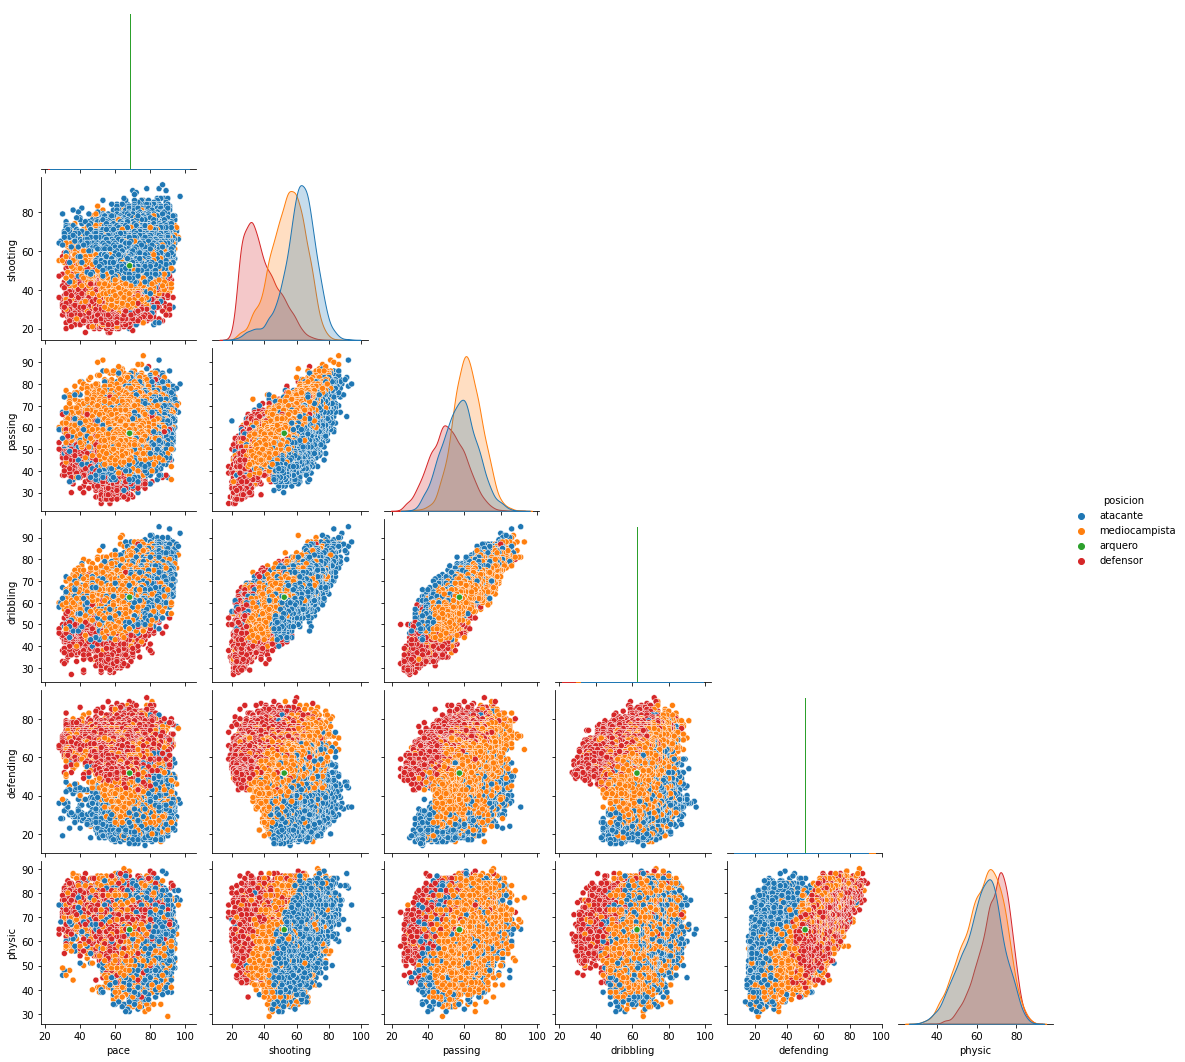

In [ ]:

col = ['pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', "posicion"]
dat = df[col]

fig = plt.figure(figsize=(10,10))
sns.pairplot(dat, hue='posicion', corner=True)

Lo mas notorio de estas correlaciones, es que los arqueros toman todos valores similares para todas las correlaciones, aunque es un patron que puede observarse en casi todas las demas posiciones. Las variables passing, dribbling y shooting muestran correlaciones con un patron lineal positivo.

<Figure size 720x720 with 0 Axes>

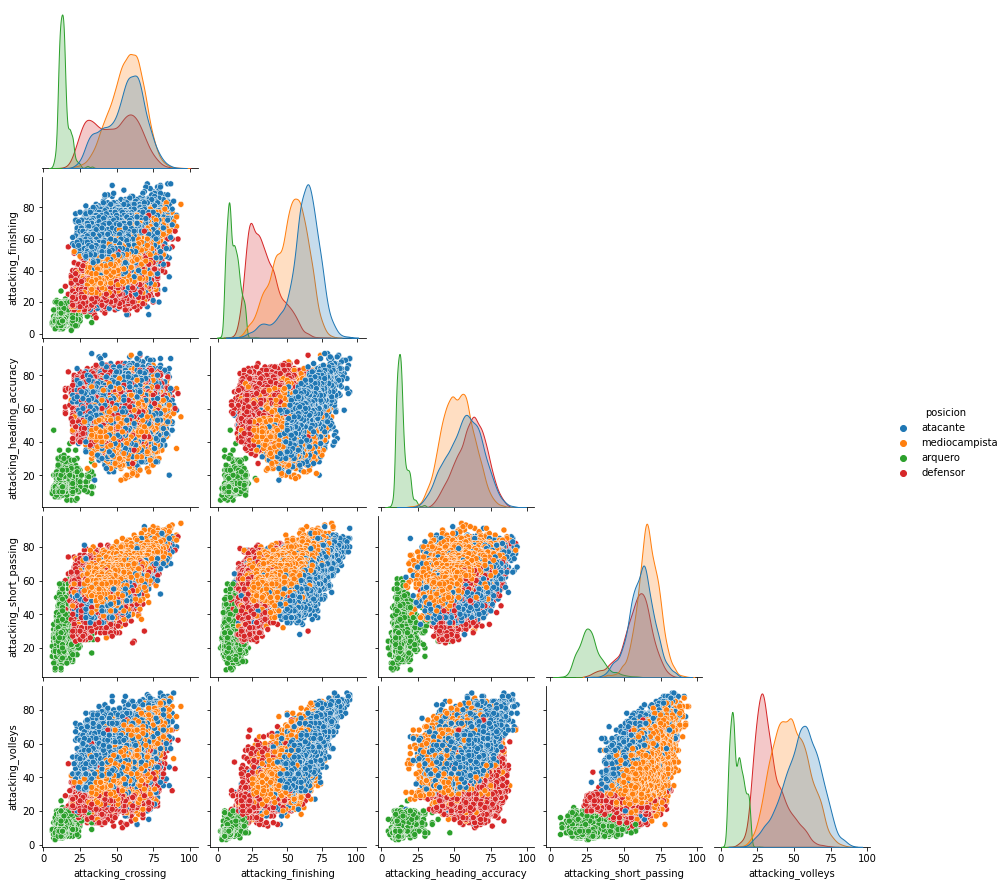

In [ ]:
col = ['attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'posicion']
dat = df[col]

fig = plt.figure(figsize=(10,10))
sns.pairplot(dat, hue='posicion', corner=True)

En estas variables relacionadas con el ataque, vemos que los arqueros tienen distribuciones alejadas del resto de las posiciones, con valores mas bajos en todos los casos. Los atacantes y mediocampistas, tienen distribuciones similares. El caso mas disimil es el de la variable "attacking crossing" en el cual los defensores se observan con una distribucion mas dispersa e incluso tienen una distribucion bimodal.

<Figure size 720x720 with 0 Axes>

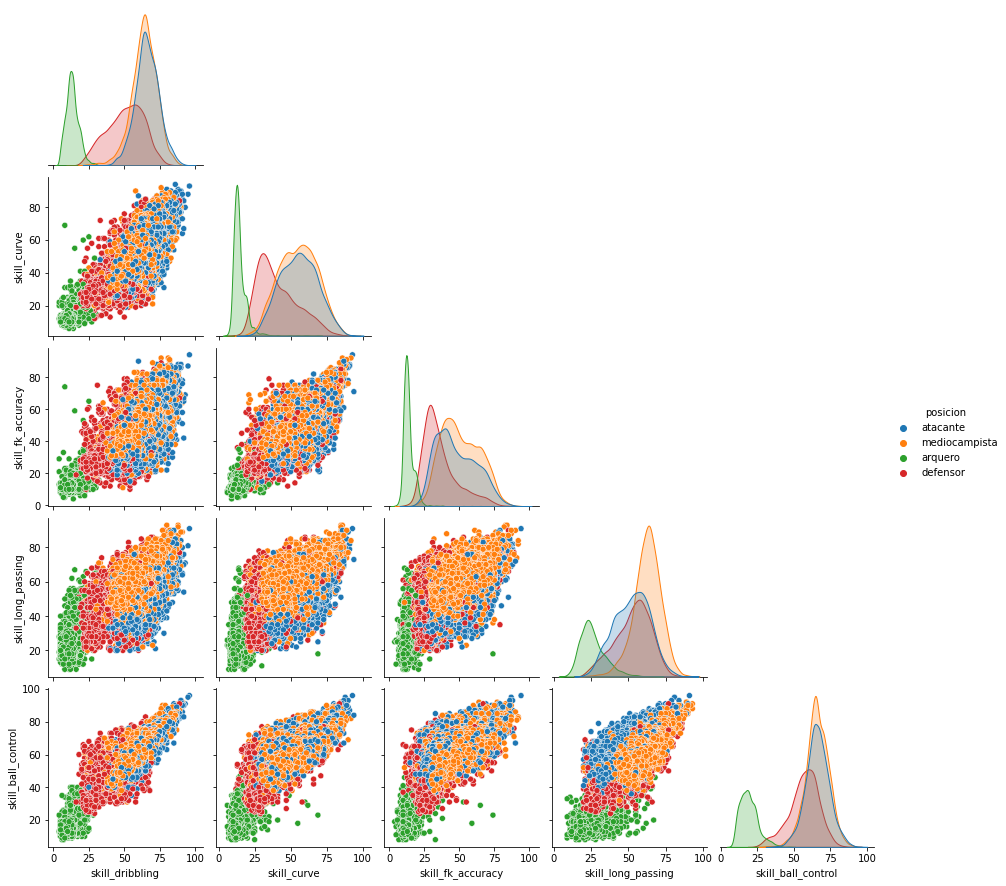

In [ ]:
col = ['skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'posicion']
dat = df[col]

fig = plt.figure(figsize=(10,10))
sns.pairplot(dat, hue='posicion', corner=True)

Al igual que en las variables anteriores, los arqueros se observan distnates al resto, y mediocampistas y atacantes mas cercanos entre si.

<Figure size 720x720 with 0 Axes>

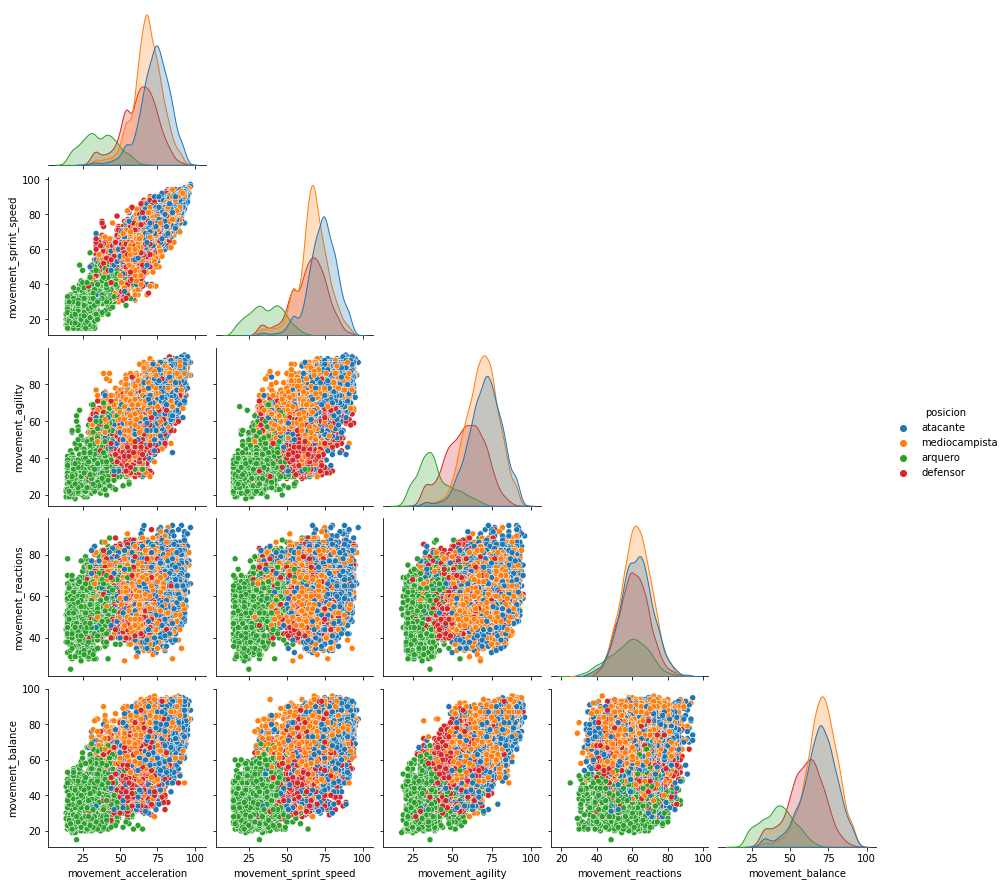

In [ ]:
col = ['movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', "movement_balance","posicion"]
dat = df[col]

fig = plt.figure(figsize=(10,10))
sns.pairplot(dat, hue='posicion', corner=True)

En este caso, la distribucion separada de de los arqueros se  hace mas notoria y las demas posiciones se desdibuja la separacion entre si.

<Figure size 720x720 with 0 Axes>

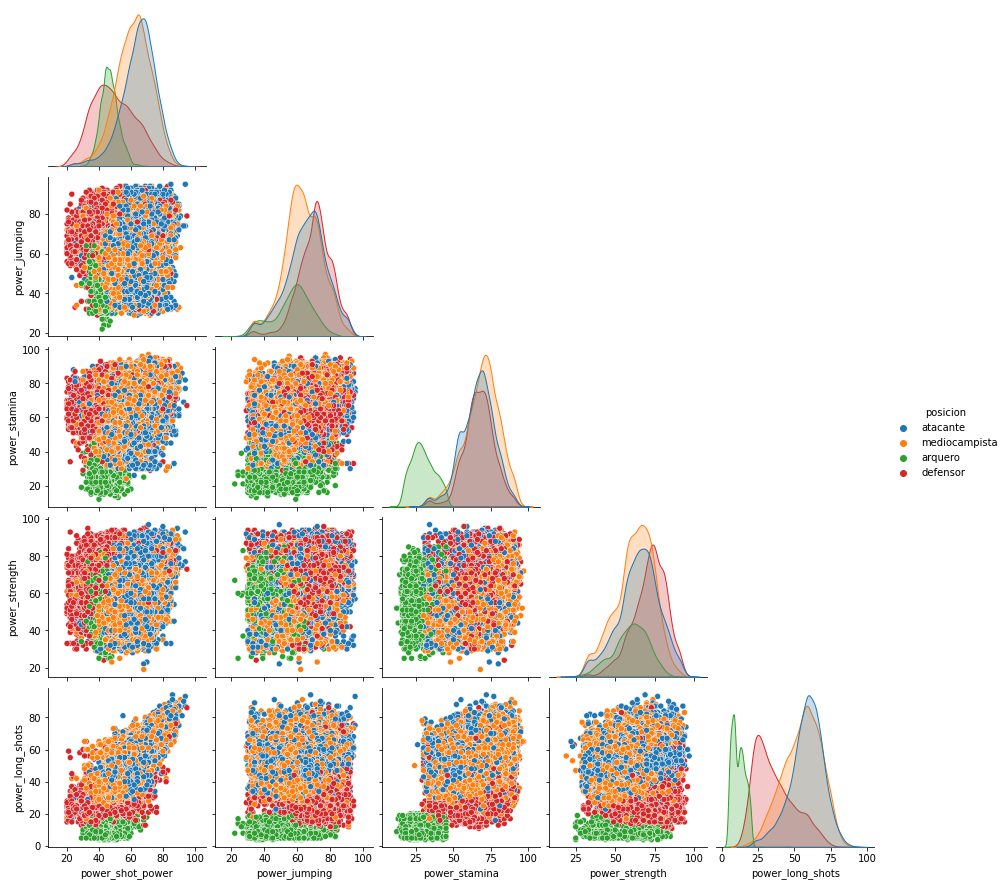

In [ ]:
col = ['power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', "posicion"]
dat = df[col]

fig = plt.figure(figsize=(10,10))
sns.pairplot(dat, hue='posicion', corner=True)

La habilidades relacionadas a la energia de los jugadores son practicamente indistinguibles entre mediocampistas y atacantes, y tambien en defensores y aruqeros en las variables power_strength y power_jumping, en cuanto a power_shot_power arqueros y defensores tienen distribuciones con medias similares.

<Figure size 720x720 with 0 Axes>

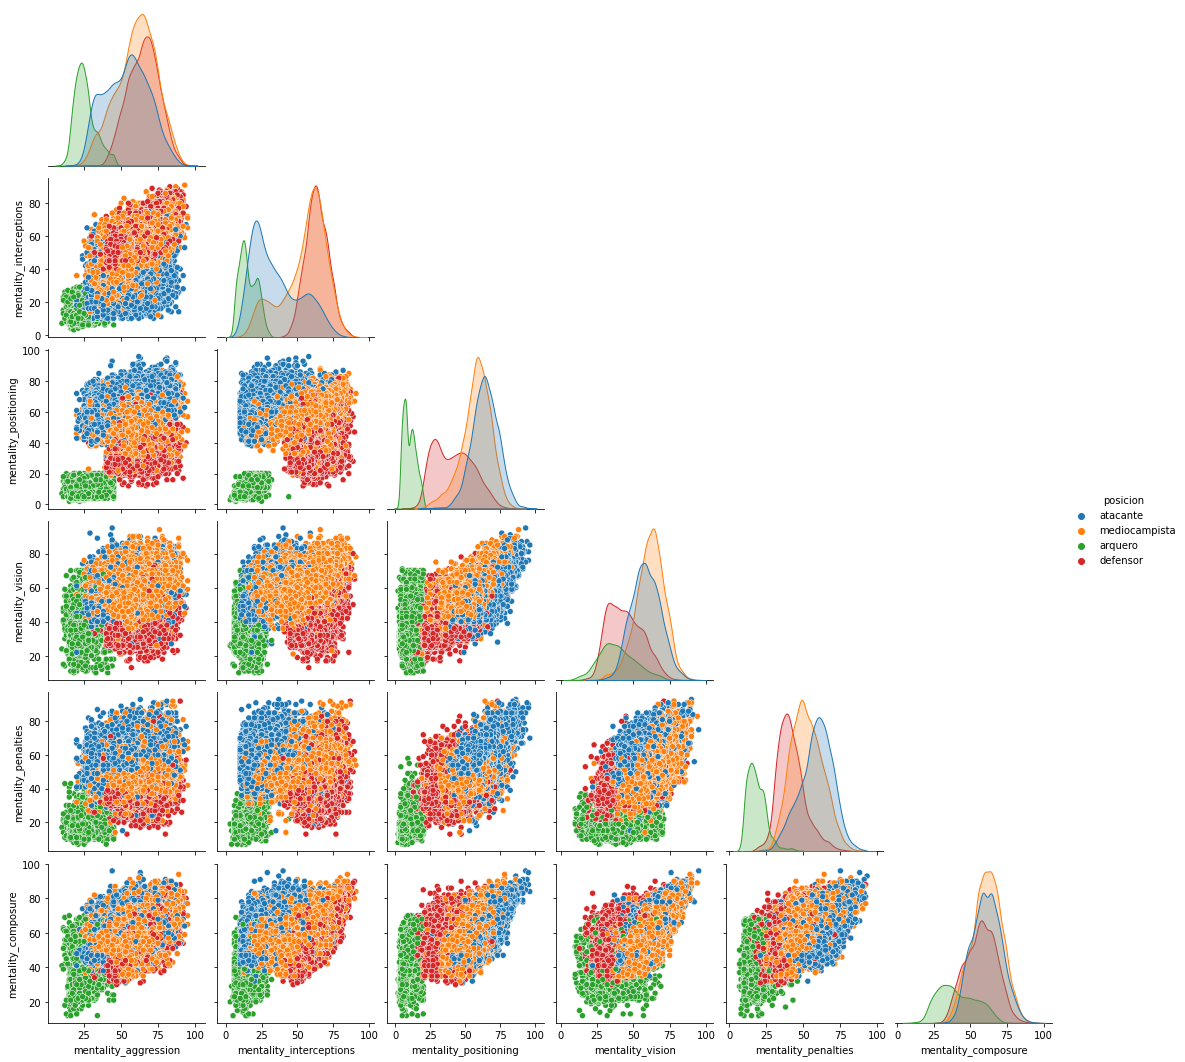

In [ ]:
col = ['mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', "posicion"]
dat = df[col]

fig = plt.figure(figsize=(10,10))
sns.pairplot(dat, hue='posicion', corner=True)

En este caso, la separacion entre grupos es muy evidente.

<Figure size 720x720 with 0 Axes>

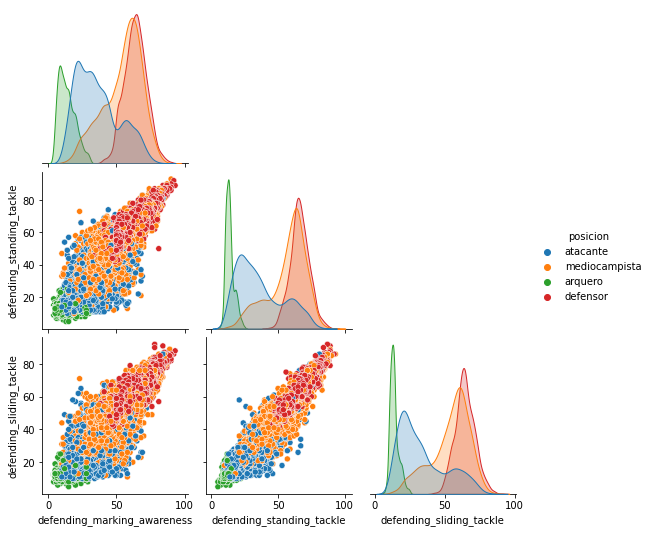

In [ ]:
col = ['defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle', "posicion"]
dat = df[col]

fig = plt.figure(figsize=(10,10))
sns.pairplot(dat, hue='posicion', corner=True)

En este caso, hay una separacion mas marcada entre arqueros y defensores por un lado, y mediocampistas y atacantes por el otro. Sin mabargo, se observa una varianza marcada en los atacantes para todas las variables.

<Figure size 720x720 with 0 Axes>

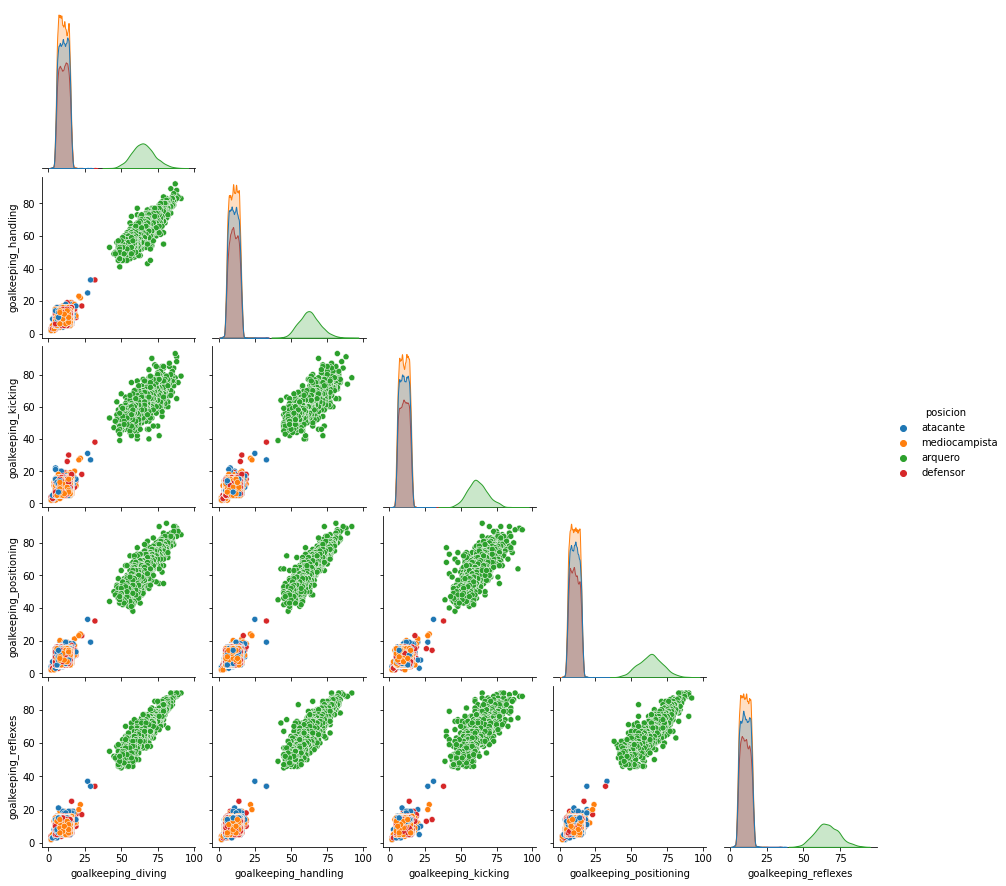

In [ ]:
col = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', "posicion"]
dat = df[col]

fig = plt.figure(figsize=(10,10))
sns.pairplot(dat, hue='posicion', corner=True)

En todas las habilidades relacionadas a goalkeeping, los arqueros presentan valores altos y con una varianza apreciable, mientras que estas habilidades son igualmente bajas para todas las demas categorias.

## 3 - Uso de tecnicas de clustering

### Comenzamos preparando el dataset a analizar

**Reducimos el tamaño de la base. Retiramos jugadores con bajo Desempeño global ("Overall"),**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [ ]:
n=10000 #cantidad de jugadores a considerar

df_n=df.loc[:n] #se reduce la base a los n primeros jugadores

#Reemplazamos todos los valores nulos por 0
df_n = df_n.fillna(0)

df_n=df_n[(df_n['overall']>70)]

skills_ratings = ['shooting', 'passing', 'dribbling', 'defending',
 'physic', 'attacking_crossing', 'attacking_finishing',
 'attacking_heading_accuracy', 'attacking_short_passing',
 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina',
 'power_strength', 'power_long_shots', 'mentality_aggression',
 'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
 'defending_standing_tackle', 'defending_sliding_tackle',
 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
 'goalkeeping_positioning', 'goalkeeping_reflexes']




print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

39 variables numéricas de desempeño según habilidad


In [ ]:
df_skills = df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [ ]:
names= df_n.short_name.tolist() #guardo los nombres para mas tarde

### Exploracion visual para clustering

Visualizamos los datos (jugadores) según sus habilidades, es decir, en un espacio 39 dimensional. Comenzamos observando de a dos variables numéricas por vez.

In [ ]:
#Diferenciamos a los mejores jugadores
bool_crack = df_n["overall"] > 85 

#Elejimos dos variables 
skill_1 = 'dribbling'
skill_2 = 'goalkeeping_positioning'

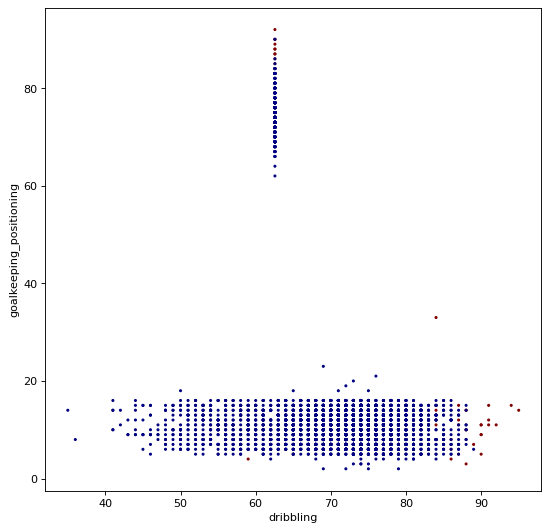

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_crack,cmap='jet')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

In [ ]:
#Diferenciamos a los arqueros
bool_GK = df_n["player_positions"] == 'GK' 

#Elejimos dos variables  
skill_1 = 'dribbling'
skill_2 = 'goalkeeping_positioning'

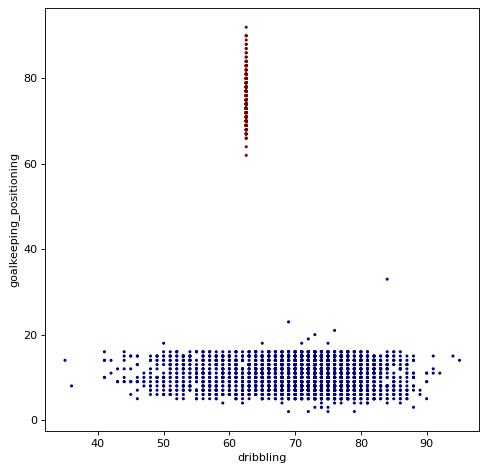

In [ ]:
plt.figure(figsize=(7,7), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_GK,cmap='jet')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

## **Clustering con K-medias**

Es necesario definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo.

Para este dataset definimos el n_clusters = 4. Seleccionamos este numero por las 4 posibles posiciones mas marcadas que existen en el futbol (arquero, defensor, mediocampista, delantero).

Dado que todas las variables se distribuyen entre valores de 0 a 100, no sería necesario realizar un escalamiento de variables.

In [ ]:
# Número de clusters buscado

km = KMeans(n_clusters=4)
km.fit(df_skills) #utiliza todas las habilidades: 39 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

df_clusters=df_skills.copy()
df_clusters['km'] = clusters #clusters
labels= km.labels_
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters.head(4)

Kmeans encontró:  4 clusters, nosotros forzamos la cantidad


shooting  passing  dribbling  defending  physic  attacking_crossing  \
0      92.0     91.0       95.0       34.0    65.0                  85   
1      92.0     79.0       86.0       44.0    82.0                  71   
2      94.0     80.0       88.0       34.0    75.0                  87   
3      83.0     86.0       94.0       37.0    63.0                  85   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       91   
1                   95                          90                       85   
2                   95                          90                       80   
3                   83                          63                       86   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               96           93                 94   
1                 89               85           79                 85   
2                 86               88           81                 84   
3                 86               95           88                 87   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  91                  96                     91   
1                  70                  88                     77   
2                  77                  88                     85   
3                  81                  95                     93   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     80                91                  94   
1                     79                77                  93   
2                     88                86                  94   
3                     89                96                  89   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             72   
1                82                90             85             76   
2                74                94             95             77   
3                84                80             64             81   

   power_strength  power_long_shots  mentality_aggression  \
0              69                94                    44   
1              86                87                    81   
2              77                93                    63   
3              53                81                    63   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     93                95   
1                       49                     95                81   
2                       29                     95                76   
3                       37                     86                90   

   mentality_penalties  mentality_composure  defending_marking_awareness  \
0                   75                   96                           20   
1                   90                   88                           35   
2                   88                   95                           24   
3                   93                   93                           35   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         35                        24                   6   
1                         42                        19                  15   
2                         32                        24                   7   
3                         32                        29                   9   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   
1                     6                   12                        8   
2                    11                   15                       14   
3                     9                   15                       15   

   goalkeeping_reflexes  km  
0           

Hacemos la prueba Para determinar el número de clústeres óptimos. Se suele utilizar el método del codo. Puede hacerse este gráfico sorteando un número secuencial de grupos en el eje X y la inercia (criterio de suma de cuadrados dentro del grupo) en el eje Y.

Text(0.5, 1.0, 'Inercia de k-Means versus número de clusters')

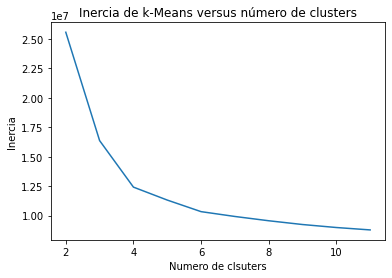

In [ ]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_clusters).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Numero de clsuters')
plt.ylabel("Inercia")
plt.title("Inercia de k-Means versus número de clusters")

Vemos en el grafico, que el cambio brusco en la evolucion de la inercia es 4, lo cual confirmamos como numero optimo de Clusters

In [ ]:
# Obtenemos los indicadores de clustering:
for i in range(2,10):
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(df_clusters)
  cluster = kmeans.predict(df_clusters)
  print('cluster con',i,'segmentos')
  print('Inercia: '+str(kmeans.inertia_)) 
  #print('Silueta: '+str(metrics.silhouette_score(X, cluster, metric='euclidean')))
  print('Silueta: '+str(metrics.silhouette_score(df_clusters, cluster, metric='cosine')))
  print('\n')

cluster con 2 segmentos
Inercia: 25548757.2294887
Silueta: 0.8667660695101662


cluster con 3 segmentos
Inercia: 16360987.352411296
Silueta: 0.5906785639208878


cluster con 4 segmentos
Inercia: 12417458.298772767
Silueta: 0.5036970356384277


cluster con 5 segmentos
Inercia: 11319633.691070061
Silueta: 0.45244088265376403


cluster con 6 segmentos
Inercia: 10338435.43595308
Silueta: 0.3634609374781296


cluster con 7 segmentos
Inercia: 9928404.765197597
Silueta: 0.31966555749094994


cluster con 8 segmentos
Inercia: 9563154.787826998
Silueta: 0.3027807565082303


cluster con 9 segmentos
Inercia: 9246121.514378395
Silueta: 0.25341577943651045




In [ ]:
#Separamos entre cracks y no cracks
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Elejimos dos variables  
skill_1 = 'dribbling'
skill_2 = 'goalkeeping_positioning'

In [ ]:
kmean_clusters = go.Scatter(x=df_clusters[skill_1], y=df_clusters[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_clusters.loc[bool_crack,skill_1], y=df_clusters.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

En el grafico vemos 4 clusters bien definidos, de los cuales los arequeros se encuentran bien diferenciados del resto

Comparamos otras 2 variables

In [ ]:
#Elejimos dos variables  
skill_1 = 'attacking_finishing'
skill_2 = 'defending'

In [ ]:
kmean_clusters = go.Scatter(x=df_clusters[skill_1], y=df_clusters[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_clusters.loc[bool_crack,skill_1], y=df_clusters.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

## **Clustering con DbScan**

La agrupación espacial basada en densidad de aplicaciones con ruido (DBCSAN) es un algoritmo de agrupación que se propuso en 1996. DBSCAN es un método de agrupación en clústeres que se utiliza en el aprendizaje automático para separar clústeres de alta densidad de clústeres de baja densidad. Dado que DBSCAN es un algoritmo de agrupamiento basado en densidad, hace un gran trabajo al buscar áreas en los datos que tienen una alta densidad de observaciones, frente a áreas de los datos que no son muy densas con observaciones. DBSCAN también puede clasificar datos en grupos de diferentes formas.

In [ ]:
# Cargamos los paquetes necesarios
from sklearn.cluster import DBSCAN
from sklearn import metrics

La diferencia con k-means es que DBSCAN no requiere que especifique el número de clústeres. Los dos parámetros principales para DBSCAN son el número mínimo de puntos que constituyen un grupo (minPts) y el tamaño de la vecindad (eps). Por lo general, el número de puntos que constituyen un punto no debe ser muy pequeño, ya que se puede generar errores en los grupos. Como regla general, se aconseja establecer el número de minPts en la misma cantidad de características que los datos. eps es un poco más difícil de optimizar y podría requerir un gráfico de distancia k para encontrar el valor correcto. A menudo se prefiere utilizar valores pequeños iterando buscando eficiencias.

En términos sencillos, encontramos un valor adecuado para épsilon calculando la distancia a los n puntos más cercanos para cada punto, ordenando y trazando los resultados. Luego miramos para ver dónde el cambio es más pronunciado.

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

Podemos calcular la distancia desde cada punto hasta su vecino más cercano usando NeighborsNeighbors. El punto en sí está incluido en n_neighbors. El método kneighbors devuelve dos matrices, una que contiene la distancia a los n_neighbors puntos más cercanos y la otra que contiene el índice para cada uno de esos puntos.

In [ ]:
# train the model using DBSCAN
db = DBSCAN(eps=1, min_samples=5)
# the prediction for dbscan clusters
db_clusters = db.fit_predict(df_skills)

Text(0, 0.5, 'Distance')

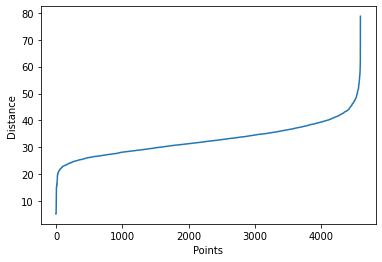

In [ ]:
# calculate the distance from each point to its closest neighbor
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_skills)


# distances, indices = nbrs.kneighbors(df_escalado)
distances, indices = nbrs.kneighbors(df_skills)

# Clasificamos y representamos los resultados.
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# plt.plot(distances)
i = np.arange(len(distances))

sns.lineplot(
    x = i, 
    y = distances
)

plt.xlabel("Points")
plt.ylabel("Distance")

De acuerdo a esta tecnica el valor de epsilon esta alrededor de 40

In [ ]:
# Creando algoritmo DBSCAN
db = DBSCAN(eps=40, min_samples=10).fit(df_skills)

# Etiquetas asignadas por el algoritmo

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [ ]:
# Mostramos los clusters generados
print("clusters: ", np.unique(labels))
print("nro de clusters:",len(np.unique(labels)) -1)
#print('Silueta: '+str(metrics.silhouette_score(df_num, model_dbscan.labels_, metric='cosine')))


clusters:  [-1  0  1  2]
nro de clusters: 3


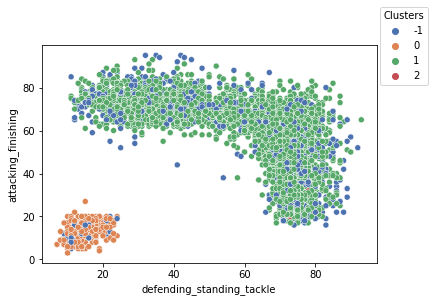

In [ ]:
p = sns.scatterplot(data=df_skills, x="defending_standing_tackle", y="attacking_finishing", hue=labels, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()


In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


skill_1='defending_standing_tackle'
skill_2='attacking_finishing'

In [ ]:
data=[]
DBSCAN_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = db_clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[DBSCAN_clusters,crack]

layout = go.Layout(title="DBSCAN",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
#En Colab
fig.show(renderer="colab")

---------------------------------------------------------------------------

## **Clustering con Mean Shifts**

La agrupación Mean Shift es un algoritmo basado en ventanas deslizantes que intenta encontrar áreas densas de puntos de datos. Es un algoritmo basado en el centroide, lo que significa que el objetivo es localizar los puntos centrales de cada clúster, lo que funciona actualizando a los candidatos para que los puntos centrales sean la media de los puntos dentro de la ventana deslizante.

In [ ]:
ms = MeanShift(bandwidth=65)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 4


Se probo con varios valores de bandwith:

*80--> 2 clusters

*65--> 4 clusters

*100--> 2 clusters

Se mantiene el valor de 65 para bandwith, dado que coincide con la agrupacion lograda con k-means y las posiciones de los jugadores

In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


skill_1='defending_standing_tackle'
skill_2='attacking_finishing'

In [ ]:
data=[]
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
#En Colab
fig.show(renderer="colab")

In [ ]:
df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  4 clusters, nosotros lo forzamos
Mean shift encontró  4 clusters, según los hiperparámetros elegidos


## Conclusiones

En este entregable utilizamos 3 tecnicas de clustering para la agrupacion de los datos de FIFA 2022: KMeans, Mean Shift y DBSCAN. El dataframe de skills, no fue normalizado debido a que se trabajo justamente con las habilidades y ya se encuentran en una escala del 1 al 100. En el caso de utilizar otras variables, con diferente escala, (ej: sueldo), seria necesario la normalizacion de los datos.
Para los graficos de los cluster resultantes, se utilizaron variables defensivas y ofensivas, de manera tal de intentar maximizar la observación de separacion de los grupos por posición.

Los hiperparametros analizados para cada metodo fueron:


*   K-means: el hiperparametro explorado fue el numero de clusters. De acuerdo al indicador de inercia, y al metodo del codo, obervamos que el numero optimo es 4. Esto se corresponde con 4 agrupaciones bien definidas asociadas a la posicion de cada jugador en la cancha.
*   DBSCAN: el hiperparametro explorado fue epsilon (eps), mientras que min_samples fue fijo (5). De acuerdo a la exploracion, el eps optimo estaba en las proximidades de 40. Este metodo logro encontrar 3 clusters, sin embargo, en el grafico estos no logran apreciarse.
*   Mean Shift: el hiperparametro explorado fue bandwith. Se probó con diferentes valores, de los cuales decidimos fijar en 65 dado que nos entregaba 4 clusters.

En todos los casos, los arqueros fueron bien diferenciados del resto de los jugadores. En el caso de este analisis, el metodo que mejor logro diferenciar todas las posciones de los jugadores fue K-means.








##4 - Tecnicas de Embedding

###t-sne

**t-SNE : t-distributed Stochastic Neighbor Embedding.**

t-SNE es una herramienta para visualizar datos altamente dimensionales. 

Los "proyecta" en menos dimensiones (2D o 3D) manteniendo la distancia entre ellos.

In [ ]:
n_sne=2000 #elegir numero pequeño para agilidad en el cálculo luego
df_sne=df_skills.loc[:n_sne]

print('dimensión del espacio de los datos: ', len(df_sne.columns))

dimensión del espacio de los datos:  39


Transformamos el espacio de 40 dimensiones en un espacio de 2 dimensiones (n_components=2)

In [ ]:
import time
from sklearn import (decomposition,manifold)
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(df_sne)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2001 samples in 0.000s...
[t-SNE] Computed neighbors for 2001 samples in 0.162s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2001
[t-SNE] Computed conditional probabilities for sample 2000 / 2001
[t-SNE] Computed conditional probabilities for sample 2001 / 2001
[t-SNE] Mean sigma: 16.552775
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.188278
[t-SNE] KL divergence after 1000 iterations: 1.320469
t-SNE done! Time elapsed: 14.193208932876587 seconds


**GRAFICAMOS: Scatter plot** 

Las variables que usamos para el scatterplot son las 2 componentes dadas por tSNE

In [ ]:
data=[]

#Graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                           marker=dict(
                                size=5)
                           )

layout = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=700)

fig = go.Figure(data=graf1, layout=layout)

In [ ]:
fig.show(renderer="colab")

In [ ]:
#Agregamos los clusters que interpretamos con kmeans que eran las posiciones para ver si notamos algo significativo.
prueba_tsne = pd.DataFrame(X_tsne).merge(df_clusters['km'], left_index=True, right_index=True, how= 'left')
prueba_tsne.head()

0          1  km
0 -14.068623  34.697365   3
1 -23.895645  28.672234   3
2 -23.702646  29.910984   3
3 -13.375419  34.710636   3
4  13.882462  19.531044   1

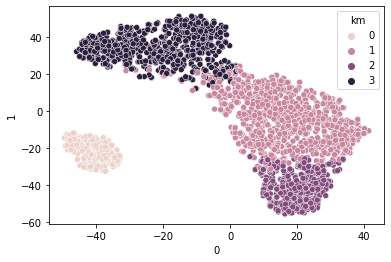

In [ ]:
 import seaborn as sns
 
 sns.scatterplot(data = prueba_tsne, x = 0, y = 1, hue = 'km')

###**Embedding con PCA**

Embeddings

Los embeddings permiten crear nuevas variables caracterizadoras/predictoras de los datos en lugar de tener que elegir un subconjunto de las presentes en el dataset. Los embeddings no tienen en cuenta etiquetas de clase y su principal característica es que proyectan a menos dimensiones preservando la mayor cantidad de información posible; minimizando el error cuadrado de reconstruir los datos originales. Son útiles para reducir la dimensionalidad del dataset, reducen el overfitting, reducen el tiempo en ingeniería de características, reducen el sesgo del analista y permiten la visualización del problema. En contraparte, se pierde parte de la información e interpretabilidad de los datos.

Para el presenta trabajo, seleccionamos el embedding PCA (Análisis de componentes principales) para utilizar en el análisis de los datos.

Se utiliza PCA para visualizar la posible cantidad óptima de clusters para implementar, por ejemplo, en KMeans para el hiperparámetro K o para orientación en el caso de obtener clusters con DBSCAN (o cualquier otro algoritmo). Es decir, se utilizará Embedding como técnica de preprocesamiento antes de implementar un algoritmo.

Sin embargo, también es posible aprovechar PCA para encontrar correlaciones entre las primeras componentes obtenidas del Embedding y el resto de las variables del dataset. De este modo es posible caracterizar a los individuos que se encuentran en cada cluster utilizando como guía las correlaciones de Pearson y, por el diagrama de dispersión que se haya obtenido con las dos (o tres) primeras componentes principales.

In [ ]:
# Definimos el conjunto de datos con los mismos criterios previos, pero además le quitamos los arqueros
df_acp = df[(df["player_positions"]!='GK')]
df_acp = df_acp[(df_acp['overall']>70)]
df_acp_Skills = df_acp[skills_ratings]
df_acp_Skills.shape

(4149, 39)

In [ ]:
df_acp_Skills.head(3)

shooting  passing  dribbling  defending  physic  attacking_crossing  \
0      92.0     91.0       95.0       34.0    65.0                  85   
1      92.0     79.0       86.0       44.0    82.0                  71   
2      94.0     80.0       88.0       34.0    75.0                  87   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       91   
1                   95                          90                       85   
2                   95                          90                       80   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               96           93                 94   
1                 89               85           79                 85   
2                 86               88           81                 84   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  91                  96                     91   
1                  70                  88                     77   
2                  77                  88                     85   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     80                91                  94   
1                     79                77                  93   
2                     88                86                  94   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             72   
1                82                90             85             76   
2                74                94             95             77   

   power_strength  power_long_shots  mentality_aggression  \
0              69                94                    44   
1              86                87                    81   
2              77                93                    63   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     93                95   
1                       49                     95                81   
2                       29                     95                76   

   mentality_penalties  mentality_composure  defending_marking_awareness  \
0                   75                   96                           20   
1                   90                   88                           35   
2                   88                   95                           24   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         35                        24                   6   
1                         42                        19                  15   
2                         32                        24                   7   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   
1                     6                   12                        8   
2                    11                   15                       14   

   goalkeeping_reflexes  
0                     8  
1                    10  
2                    11

In [ ]:
print('los datos tienen dimesión n= ',len(skills_ratings))

los datos tienen dimesión n=  39


In [ ]:
attributes_pca=df_acp_Skills.columns
for i, col in enumerate(attributes_pca):
    print (f'{i} - {col}')

0 - shooting
1 - passing
2 - dribbling
3 - defending
4 - physic
5 - attacking_crossing
6 - attacking_finishing
7 - attacking_heading_accuracy
8 - attacking_short_passing
9 - attacking_volleys
10 - skill_dribbling
11 - skill_curve
12 - skill_fk_accuracy
13 - skill_long_passing
14 - skill_ball_control
15 - movement_acceleration
16 - movement_sprint_speed
17 - movement_agility
18 - movement_reactions
19 - movement_balance
20 - power_shot_power
21 - power_jumping
22 - power_stamina
23 - power_strength
24 - power_long_shots
25 - mentality_aggression
26 - mentality_interceptions
27 - mentality_positioning
28 - mentality_vision
29 - mentality_penalties
30 - mentality_composure
31 - defending_marking_awareness
32 - defending_standing_tackle
33 - defending_sliding_tackle
34 - goalkeeping_diving
35 - goalkeeping_handling
36 - goalkeeping_kicking
37 - goalkeeping_positioning
38 - goalkeeping_reflexes


In [ ]:
pca=decomposition.PCA(n_components=3) #elegimos 2, 3 o 4 pero pueden ser más, 

pca.fit(df_acp_Skills) 

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(df_acp_Skills) #numpy array
print ('tamaño de los datos: ', X_projected.shape)

proporción de varianza por componente:  [0.49606428 0.18180057 0.08527161]
proporción de varianza por componente acumulada:  [0.49606428 0.67786485 0.76313646]
tamaño de los datos:  (4149, 3)


Los 3 primeros principales componentes acumulan el 76% de la varianza por lo cual probamos con los primeros 3.

In [ ]:
proyecciones_df = pd.DataFrame(
    X_projected,
    columns =  ['PC1', 'PC2', 'PC3'],
    index   = df_acp_Skills.index
)
proyecciones_df.head(3)

PC1        PC2        PC3
0 -126.867975 -43.209578  10.003110
1  -91.074280 -24.682770  52.366049
2 -112.830567 -17.811338  37.439066

In [ ]:
proyecciones_df['Position']=df_acp["posicion"]

In [ ]:
proyecciones_df

PC1        PC2        PC3       Position
0    -126.867975 -43.209578  10.003110       atacante
1     -91.074280 -24.682770  52.366049       atacante
2    -112.830567 -17.811338  37.439066       atacante
3    -110.679138 -38.093506  -2.338298       atacante
4     -58.022738 -83.592218  26.763820  mediocampista
...          ...        ...        ...            ...
4588   12.415622   1.828108  -6.592735  mediocampista
4589    9.049366 -28.213463  13.918011  mediocampista
4590   28.677663   1.266745 -37.843930  mediocampista
4591  -36.769221  42.784854   8.009588       atacante
4592   15.999457  -7.950847  14.048335  mediocampista

[4149 rows x 4 columns]

In [ ]:
proyecciones_df.isna().sum()

PC1         0
PC2         0
PC3         0
Position    0
dtype: int64

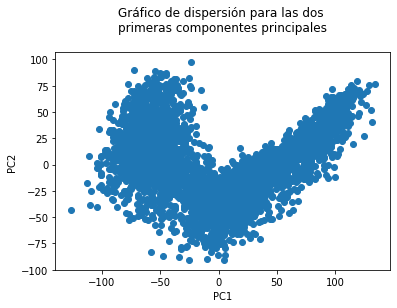

In [ ]:
plt.scatter(X_projected[:,0], X_projected[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Gráfico de dispersión para las dos \nprimeras componentes principales\n')
plt.show()

Se pueden apreciar, aunque no con tanta claridad, distintos grupos. Utilizando la variable posición es posible indagar un poco más sobre estos posibles conglomerados.

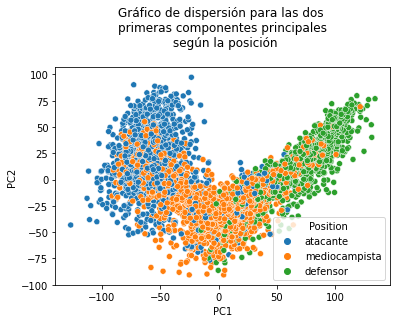

In [ ]:
sns.scatterplot(data=proyecciones_df, x="PC1", y="PC2", hue='Position')
plt.title('Gráfico de dispersión para las dos \nprimeras componentes principales\n según la posición\n')
plt.show()

En un gráfico 3D efectivamente es posible apreciar emergen 3 grupos por separado.

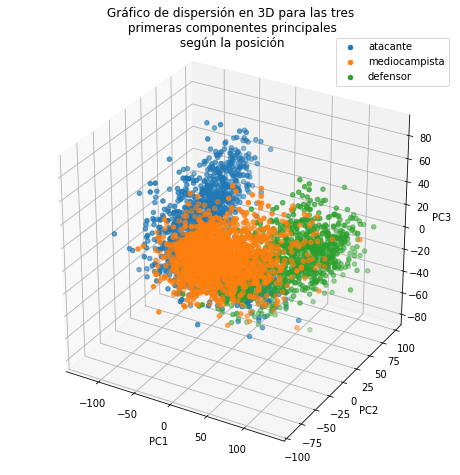

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.title('Gráfico de dispersión en 3D para las tres\n primeras componentes principales\n según la posición\n')

for s in proyecciones_df.Position.unique():
    ax.scatter(proyecciones_df.PC1[proyecciones_df.Position==s],proyecciones_df.PC2[proyecciones_df.Position==s],proyecciones_df.PC3[proyecciones_df.Position==s],label=s)
    
ax.legend()
plt.show()

Este gráfico muestra con mayor certeza grupos distintos, sin embargo en la zona central puede observarse una nube de puntos con cierta profundidad.


Efectivamente, con el gráfico 3D es posible visualizar tres grupos, sin los arqueros.

El embedding, además de proporcionar una visualización respecto a los posibles grupos que pueden emerger en un algoritmo de clustering, también ayuda a dar sentido a esos conglomerados. Esto se puede pensar como un problema de análisis de correlación lineal entre las primeras componentes del PCA y el resto de las variables (numéricas) del dataset.

In [ ]:
df_correlaciones=pd.concat([df_acp_Skills, proyecciones_df[['PC1','PC2','PC3']]], axis=1, ignore_index= False)
df_correlaciones.head(5)

shooting  passing  dribbling  defending  physic  attacking_crossing  \
0      92.0     91.0       95.0       34.0    65.0                  85   
1      92.0     79.0       86.0       44.0    82.0                  71   
2      94.0     80.0       88.0       34.0    75.0                  87   
3      83.0     86.0       94.0       37.0    63.0                  85   
4      86.0     93.0       88.0       64.0    78.0                  94   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       91   
1                   95                          90                       85   
2                   95                          90                       80   
3                   83                          63                       86   
4                   82                          55                       94   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               96           93                 94   
1                 89               85           79                 85   
2                 86               88           81                 84   
3                 86               95           88                 87   
4                 82               88           85                 83   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  91                  96                     91   
1                  70                  88                     77   
2                  77                  88                     85   
3                  81                  95                     93   
4                  93                  91                     76   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     80                91                  94   
1                     79                77                  93   
2                     88                86                  94   
3                     89                96                  89   
4                     76                79                  91   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             72   
1                82                90             85             76   
2                74                94             95             77   
3                84                80             64             81   
4                78                91             63             89   

   power_strength  power_long_shots  mentality_aggression  \
0              69                94                    44   
1              86                87                    81   
2              77                93                    63   
3              53                81                    63   
4              74                91                    76   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     93                95   
1                       49                     95                81   
2                       29                     95                76   
3                       37                     86                90   
4                       66                     88                94   

   mentality_penalties  mentality_composure  defending_marking_awareness  \
0                   75                   96                           20   
1                   90                   88                           35   
2                   88                   95                           24   
3                   93                   93                           35   
4                   83                   89                           68   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         35                        24                   6   
1   

**HEATMAP de correlación con PC1 - PC2 - PC3**

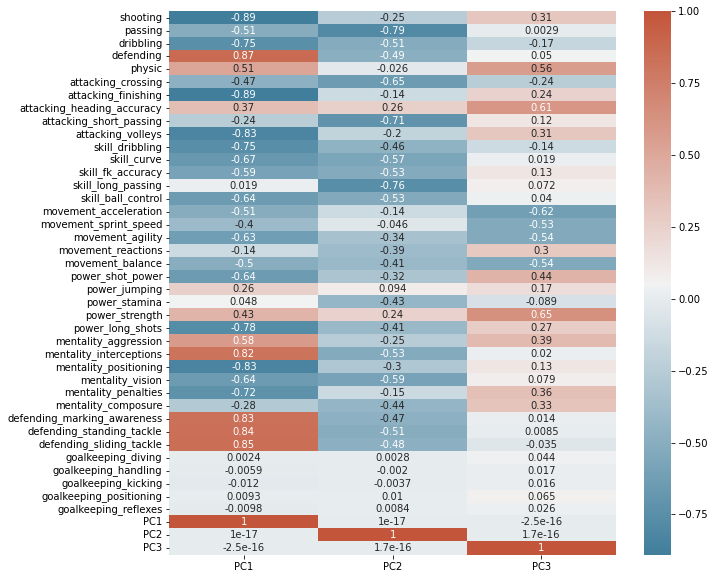

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
target_corr = pd.DataFrame(df_correlaciones.corr()[['PC1','PC2','PC3']], index=df_correlaciones.corr().index)

plt.figure(figsize=(10,10))
sns.heatmap(target_corr, annot=True, cmap=cmap)

plt.show()

En el heatmap de correlación se puede observar que las habilidades de defensa están positivamente correlacionadas con la componente principal PC1.
Para estas mismas variables los valores de correlación con la segunda componente no son tan bajos (aunque representan una fuerza de correlación bastante menor que la dada para PC1) por lo que es posible pensar que en PC2 los puntos que se corresponden a las variables de carácter defensivo se ubican en coordenadas con valores intermedios respecto a esta componente principal. Observar también que mentality_interceptions tiene una correlación positiva alta con la primer componente , es decir, esta variable se corresponde con valores grandes en PC1. Observando nuevamente el gráfico de dispersión para las dos primeras componentes principales, es de esperar que estas habilidades se correspondan con jugadores en posición defensiva, tal como se ve en el conglomerado de puntos verdes.

Por otro lado, es de esperar que los mediocampistas se encuentren en puntos donde la segunda componente tiene valores altos ya que, habilidades relacionadas con jugadores en esta posición tiene valores de correlación positiva con PC2. Por ejemplo, skill-short-passing y skill_long_passing; también habilidades de tipo mentales como mentality_vision tiene una correlación positiva, aunque con menor fuerza que las nombradas anteriormente. 

Al observar el mapa de correlación se aprecia que hay muchas variables con correlación negativa respecto a la primera componente, siendo la mayoría asociadas a habilidades de delanteros (aunque algunas también se podrían asociar con mediocampistas). Notar que en particular, hay habilidades que están correlacionadas (con mayor o menor fuerza) de forma negativa con PC1 pero también, y de la misma forma, con PC3. Por ejemplo: movement_acceleration, movement_sprint_speed, movement_agility, movement_balance. Esto quiere decir que valores bajos en PC1 y PC3 se corresponden con valores altos de estas features.

In [ ]:
# MachineGunDict={'short_name':'MachineGun','overall':99}
# for skills in skills_ratings:
#     MachineGunDict[skills]=99
    
# #Lo agregamos a la base:
# df_acp2=df_acp.append(MachineGunDict,ignore_index=True)
# X=df_acp2[skills_ratings] # Datos sin estandarizar
# X_projected2=pca.transform(X) # volvemos a proyectar pero con el dato nuevo

In [ ]:
# proyecciones_df2 = pd.DataFrame(
#     X_projected2,
#     columns =  ['PC1', 'PC2', 'PC3'],
#     index   = X.index
# )
# proyecciones_df2.head(3)

In [ ]:
# proyecciones_df2['Position']=df_acp2["posicion"]

In [ ]:
# #Graph 2
# #Choose your player
# recherche_joueur=df_acp2["short_name"]=='L. Messi'

# bool_crack=df_acp2["overall"] > 85
# bool_no_crack=df_acp2["overall"]<86
# bool_machinegun=df_acp2["short_name"]=='MachineGun'

# palette=['navy','red','#A2D5F2','orange','green','pink']  
# data=[]

# acp_crack =go.Scatter(x=X_projected2[bool_crack,0], y=X_projected2[bool_crack,1],name='Crack',
#                       text=df_acp2.loc[bool_crack,'short_name'],
#                       textfont=dict(family='sans serif',size=15,color='black'),
#                       opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

# acp_no_crack =go.Scatter(x=X_projected2[bool_no_crack,0], y=X_projected2[bool_no_crack,1],name='Average player',
#                          text=df_acp2.loc[bool_no_crack,'short_name'],
#                          opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')

# acp_machinegun =go.Scatter(x=X_projected2[bool_machinegun,0], y=X_projected2[bool_machinegun,1],name='Perfect player',
#                            textfont=dict(family='sans serif',size=20,color='black'),
#                            opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


# joueur_recherche =go.Scatter(x=X_projected2[recherche_joueur,0], y=X_projected2[recherche_joueur,1],name='Searched player',
#                            text=df_acp2.loc[recherche_joueur,'short_name'],
#                             textfont=dict(family='sans serif',size=20,color='black'),
#                            opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

# data=[acp_no_crack,acp_crack,acp_machinegun,joueur_recherche]



# layout = go.Layout(title="ACP - Fifa Players",titlefont=dict(size=20),
#                 xaxis=dict(title='Componente 1'),
#                 yaxis=dict(title='componente 2'),
#                 autosize=False, width=1000,height=750)

# fig = go.Figure(data=data, layout=layout)

# plot(fig)
# iplot(fig)
# fig.show(renderer="colab")

